# Домашнее задание 3

### Исследование характеристик, влияющих на успеваемость студентов

## 1. Общий обзор источников данных

Импортируем необходимые библиотеки

In [1]:
#import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Исходные данные в файлах train.csv, lectures.csv, questions.csv могут быть скачаны по ссылке https://drive.google.com/drive/folders/1k0k3d-WO9kYqp0q9QG1WcmLn6mWWs0Zd

Объем train.csv > 5 Гбайт, что не позволяет подгрузить его и исследовать в полном объеме стандартными методами

(из-за ограничений как по аппаратной части рабочего компьютера, так и по выделенным ресурсам Colab)

Нижеприведенный код написан для случая, когда указанные файлы сохранены на локальном диске в той же папке, что и ноутбук.

Если расположение баз иное, перед тестированием кода требуется соответствующим образом поправить переменные в ячейке ниже:

In [2]:
#Пути к файлам с исходными данными:
train_path = 'train.csv'
lectures_path = 'lectures.csv'
questions_path = 'questions.csv'


В условиях задачи даны типы данных в базе train.csv

Это позволяет при загрузке использовать более легкие типы данных чем по умолчанию

In [3]:
dtypes = {
    'row_id': 'int32',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}


Для анализа данных по всей базе требуется либо более мощное оборудование, либо использование библиотек, которые не входят в объем пройденного материала к моменту выполнения данного домашнего задания.

Поскольку доступные аппаратные ресурсы не позволяют открыть файл полностью, анализ проведем на первых 10 млн строк базы.

Для того, чтобы оценить репрезентативность данной выборки относительно общей базы, требуется, как минимум, сравнить основные характеристики распределения по интересующим столбцам. В данной работе это не осуществляется, поскольку файл в полном объеме не открывается. Если в базе не производилось упорядочивание данных по признакам-факторам и/или целевой переменной, выборка по закону больших чисел с высокой вероятностью будет репрезентативной для всей базы.

Для получения общего представления о содержимом датафрейма, выводим его начало, конец и общую информацию о датафрейме

In [4]:
input_rows = 10000000
df_train = pd.read_csv(train_path, dtype=dtypes, nrows=input_rows)
df_train.head(20)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


In [5]:
df_train.tail(20)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
9999980,9999980,606238706,216747867,1239,0,394,0,1,25000.0,True
9999981,9999981,606265169,216747867,10686,0,395,0,1,17000.0,True
9999982,9999982,606293410,216747867,724,0,396,0,0,18000.0,True
9999983,9999983,606343500,216747867,421,0,397,0,1,16000.0,True
9999984,9999984,645781395,216747867,5038,0,399,0,1,28000.0,True
9999985,9999985,645803716,216747867,5192,0,400,3,0,16000.0,True
9999986,9999986,645831878,216747867,5250,0,401,3,1,9000.0,True
9999987,9999987,645847539,216747867,8514,0,402,0,1,16000.0,True
9999988,9999988,645870161,216747867,5619,0,403,0,1,5000.0,True
9999989,9999989,645906815,216747867,6016,0,404,3,1,7000.0,True


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3)
memory usage: 276.6 MB


In [7]:
df_train.describe()


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547560e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.969462e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


Чтобы лучше понять логику заполнения данных, посмотрим данные по некоторым конкретным пользователям

Для примера возьмем пользователей, по которым в датафрейме более 200 записей

In [8]:
mask11=df_train.pivot_table(index='user_id',values='content_id', aggfunc='count')['content_id'] > 200
df_train.pivot_table(index='user_id',values='content_id', aggfunc='count')[mask11]

,content_id
user_id,
12741,271
13134,1250
24418,6464
44331,294
91216,1897
...,...
216687345,811
216707347,4334
216711441,370


Выберем студента с user_id=12741 (271 запись в датафрейме), посмотрим, как выглядят первые 60 подряд записей по нему в базе

In [9]:
df_train[df_train['user_id']==12741].head(60)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
353,353,0,12741,5145,0,0,3,0,NaN,<NA>
354,354,22273,12741,9691,0,1,3,1,13000.0,False
355,355,54323,12741,9697,0,2,2,0,18000.0,False
356,356,92046,12741,5202,0,3,3,1,29000.0,False
357,357,109716,12741,4787,0,4,3,1,35000.0,False
358,358,132679,12741,5695,0,5,3,0,15000.0,False
359,359,158477,12741,7858,0,6,2,1,21000.0,False
360,360,184033,12741,5653,0,7,3,0,23000.0,False
361,361,216619,12741,5889,0,8,3,1,23000.0,False
362,362,241650,12741,4764,0,9,2,0,30000.0,False


Также посмотрим записи по учащемуся с user_id=216687345 (811 записей в датафрейме)

In [10]:
df_train[df_train['user_id']==216687345].head(60)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
9992408,9992408,0,216687345,6057,0,0,1,1,NaN,<NA>
9992409,9992409,25284,216687345,3689,0,1,1,1,25000.0,False
9992410,9992410,44402,216687345,5880,0,2,3,0,21000.0,False
9992411,9992411,71186,216687345,6456,0,3,3,0,16000.0,False
9992412,9992412,96379,216687345,6411,0,4,1,0,24000.0,False
9992413,9992413,127023,216687345,3988,0,5,3,0,22000.0,False
9992414,9992414,140585,216687345,4998,0,6,3,0,28000.0,False
9992415,9992415,158120,216687345,4231,0,7,0,0,11000.0,False
9992416,9992416,176981,216687345,5976,0,8,2,1,15000.0,False
9992417,9992417,273329,216687345,4340,0,9,1,1,16000.0,False


In [11]:
df_train[df_train['user_id']==216687345].iloc[60:120]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
9992468,9992468,4359952605,216687345,560,0,60,1,0,19000.0,True
9992469,9992469,4359998268,216687345,935,0,61,0,1,17000.0,True
9992470,9992470,4360060979,216687345,10684,0,62,0,1,16000.0,True
9992471,9992471,4360122148,216687345,468,0,63,3,1,21000.0,True
9992472,9992472,4360171091,216687345,319,0,64,0,0,17000.0,True
9992473,9992473,4360211021,216687345,319,0,66,1,1,21000.0,True
9992474,9992474,4360238405,216687345,728,0,67,0,1,9000.0,True
9992475,9992475,4360268774,216687345,1137,0,65,3,1,21000.0,True
9992476,9992476,4360311831,216687345,1068,0,68,0,1,19000.0,True
9992477,9992477,4360347528,216687345,277,0,69,1,1,21000.0,True


In [12]:
df_train[df_train['user_id']==216687345].iloc[120:180]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
9992528,9992528,4419324332,216687345,4762,0,120,1,1,19000.0,True
9992529,9992529,4419347719,216687345,5568,0,121,2,1,15000.0,True
9992530,9992530,4419383311,216687345,5183,0,122,2,0,9000.0,True
9992531,9992531,4419517221,216687345,18545,1,124,-1,-1,NaN,False
9992532,9992532,4419526881,216687345,5183,0,125,1,1,17000.0,True
9992533,9992533,4419545265,216687345,6185,0,126,0,0,5000.0,True
9992534,9992534,4419583103,216687345,9385,0,123,2,0,9000.0,True
9992535,9992535,4511763981,216687345,4410,0,127,0,0,21000.0,True
9992536,9992536,4511793689,216687345,4965,0,128,3,1,25000.0,True
9992537,9992537,4511834850,216687345,6154,0,129,3,1,17000.0,True


Исходя из этих примеров, можно предположить, что данные в базе упорядочены по user_id, а внутри одного user_id - по timestamp.

Также видно, что в поле task_container_id номера, как правило, следуют по порядку (с некоторыми исключениями), а в колонке content_id такой закономерности не наблюдается. Последовательно идущие вопросы иногда объединяются в группы с одним task_container_id, но в большинстве случаев такого не происходит.

Если user_id присваиваются по хронологии, без каких-то группировок и сортировок учащихся до момента присвоения user_id, такое упорядочивание не должно повлиять на репрезентативность выборки, состоящей из первых 10 млн строк базы данных train.csv.
Однако, если за период формирования данных, вошедших в train.csv, происходили существенные изменения в учебном процессе, процессе тестирования, интерфейсе учебной платформы, характеристиках учащихся и т.п., то это могло привести к изменению закономерностей с течением времени, в результате данные по первым user_id могут иметь смещенные характеристики относительно данных по базе в целом.

Также исследуем файл lectures.csv

In [13]:
df_lectures=pd.read_csv(lectures_path)
df_lectures.head(20)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


In [14]:
df_lectures.tail()

,lecture_id,tag,part,type_of
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept
417,32736,82,3,concept


In [15]:
df_lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [16]:
df_lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


Как видим, это относительно небольшой справочник, содержащий дополнительные признаки лекций.

Пропуски данных отсутствуют

Аналогичные операции осуществляем с файлом questions.csv

In [17]:
df_questions=pd.read_csv(questions_path)
df_questions.head(10)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


In [18]:
df_questions.tail(20)

,question_id,bundle_id,correct_answer,part,tags
13503,13503,13503,0,5,79
13504,13504,13504,1,5,55
13505,13505,13505,0,5,1
13506,13506,13506,0,5,173
13507,13507,13507,0,5,79
13508,13508,13508,2,5,1
13509,13509,13509,3,5,53
13510,13510,13510,0,5,134
13511,13511,13511,1,5,179
13512,13512,13512,0,5,96


In [19]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [20]:
df_questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


Видно, что questions.csv - справочник с реквизитами вопросов на 13,5 тыс. записей. В памяти он занимает менее 1 Мбайта, поэтому смысла оптимизировать типы данных в столбцах нет

В колонке tags имеется 1 пропущенное значение 

Посмотрим подробнее на колонки question_id и bundle_id. На первый взгляд, они почти что совпадают

In [21]:
df_questions[df_questions['question_id']!=df_questions['bundle_id']]

,question_id,bundle_id,correct_answer,part,tags
1401,1401,1400,0,3,136 92 102
1402,1402,1400,1,3,82 92 102
1404,1404,1403,0,3,136 38 29
1405,1405,1403,3,3,82 38 29
1407,1407,1406,3,3,136 38 102
...,...,...,...,...,...
13246,13246,13244,1,3,136 81 92
13248,13248,13247,2,3,136 81 92
13249,13249,13247,1,3,136 81 92
13251,13251,13250,2,3,136 81 92


In [22]:
df_questions[df_questions['question_id']<df_questions['bundle_id']]

,question_id,bundle_id,correct_answer,part,tags


In [23]:
df_questions[df_questions['question_id']-df_questions['bundle_id']>4]

,question_id,bundle_id,correct_answer,part,tags


Данные выше показывают, что 72% значений столбцов question_id и bundle_id совпадают, остальные различаются не более чем на 4 единицы.

Для дальнейшего анализа можно считать, что эти столбцы практически идентичны

## 2. Анализ на наличие дубликатов и пропусков

Если в датафреймах имеются дубликаты, это приведет к завышению веса дублируемых строк в общей выборке и искажению характеристик выборки.
Поэтому надо проверить датафреймы на наличие дубликатов

In [24]:
duplicates = df_train.duplicated()
duplicates[duplicates] # Выводим только строки, где значение строки = True, то есть, зафиксирован дубликат

Series([], dtype: bool)

In [25]:
duplicates = df_lectures.duplicated()
duplicates[duplicates] # Выводим только строки, где значение строки = True, то есть, зафиксирован дубликат

Series([], dtype: bool)

In [26]:
duplicates = df_questions.duplicated()
duplicates[duplicates] # Выводим только строки, где значение строки = True, то есть, зафиксирован дубликат

Series([], dtype: bool)

Ячейки отработали и выдали пустые объекты series по каждому датафрейму, значит дубликатов в этих датафреймах нет

Выведем информацию о наличии пропусков по столбцам датафреймов

In [27]:
m_data = {'Count': df_train.isnull().sum(), 'Percentage': df_train.isnull().sum() / input_rows * 100}
missed_data=pd.DataFrame(m_data)
missed_data

,Count,Percentage
row_id,0,0.00000
timestamp,0,0.00000
user_id,0,0.00000
content_id,0,0.00000
content_type_id,0,0.00000
task_container_id,0,0.00000
user_answer,0,0.00000
answered_correctly,0,0.00000
prior_question_elapsed_time,234784,2.34784
prior_question_had_explanation,39388,0.39388


Пропуски имеются в 2 последних столбцах. Их объем в выборке несущественный (2,35% и 0,39%).

Пропуски могут объясняться информацией, представленной в условиях задачи (столбцы заполняются null для первой серии тестов и лекций).

В любом случае, для корректной работы функций анализа данных пропуски нужно исключить. На данном этапе аргументов в пользу удаления этих строк нет, поэтому столбец prior_question_elapsed_time заполняем нулями, а prior_question_had_explanation - значением False

Создадим дополнительный вспомогательный столбец nan_changed, в котором будем хранить True для строк, в которых мы заполняли пропуски, False - для остальных строк. Это может помочь, если при анализе потребуется учесть этот признак, либо восстановить начальную информацию

In [28]:
df_train['nan_changed'] = False
df_train.loc[df_train['prior_question_elapsed_time'].isna(), 'nan_changed'] = True
df_train['prior_question_elapsed_time']=df_train['prior_question_elapsed_time'].fillna(0)
df_train.loc[df_train['prior_question_had_explanation'].isna(), 'nan_changed'] = True
df_train['prior_question_had_explanation']=df_train['prior_question_had_explanation'].fillna(False)
df_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,nan_changed
0,0,0,115,5692,0,1,3,1,0.0,False,True
1,1,56943,115,5716,0,2,2,1,37000.0,False,False
2,2,118363,115,128,0,0,0,1,55000.0,False,False
3,3,131167,115,7860,0,3,0,1,19000.0,False,False
4,4,137965,115,7922,0,4,1,1,11000.0,False,False


Проверяем, что получилось (типы данных и количество ненулевых значений по столбцам)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 11 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
 10  nan_changed                     bool   
dtypes: bool(1), boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3)
memory usage: 286.1 MB


In [30]:
df_train.count()

row_id                            10000000
timestamp                         10000000
user_id                           10000000
content_id                        10000000
content_type_id                   10000000
task_container_id                 10000000
user_answer                       10000000
answered_correctly                10000000
prior_question_elapsed_time       10000000
prior_question_had_explanation    10000000
nan_changed                       10000000
dtype: int64

Как видим, теперь в df_train отсутствуют пропуски

Перейдем к датафрейму df_questions, ранее было показано, что в этом справочнике пропущено одно значение в колонке tags

In [31]:
df_questions[df_questions['tags'].isnull()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [32]:
df_questions[10020:10040]

,question_id,bundle_id,correct_answer,part,tags
10020,10020,10017,2,6,55
10021,10021,10021,2,6,54
10022,10022,10021,3,6,27
10023,10023,10021,2,6,151
10024,10024,10021,1,6,73
10025,10025,10025,2,6,1
10026,10026,10025,1,6,27
10027,10027,10025,1,6,53
10028,10028,10025,0,6,109
10029,10029,10029,2,6,179


Из представленных данных нельзя сделать никаких выводов по поводу того, каким должен быть корректный тэг у вопроса с индексом 10033.

Удалять строку нежелательно, чтобы не нарушать целостность справочника. Поэтому заменим пропуск на 0.

In [33]:
df_questions = df_questions.fillna(0)
df_questions[10020:10040]

,question_id,bundle_id,correct_answer,part,tags
10020,10020,10017,2,6,55
10021,10021,10021,2,6,54
10022,10022,10021,3,6,27
10023,10023,10021,2,6,151
10024,10024,10021,1,6,73
10025,10025,10025,2,6,1
10026,10026,10025,1,6,27
10027,10027,10025,1,6,53
10028,10028,10025,0,6,109
10029,10029,10029,2,6,179


In [34]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13523 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


Мы проверили, что больше в df_questions нет пропусков данных

Проведем еще одну проверку - по логике каждой строке из датафрейма df_train должна соответствовать либо строка из справочника с лекциями, либо из справочника с вопросами. Тут возможны несоответствия справочников, что было бы проблемой для последующего анализа

Создадим служебный датафрейм, склеив df_train сначала с df_lectures, а потом с df_questions по предусмотренным полям content_id, lecture_id, question_id

In [35]:
# склеиваем основной датафрейм со справочником лекций по предусмотренным ключам
df_j_train = df_train.join(df_lectures.set_index('lecture_id'), on='content_id', how='left') 
df_j_train[df_j_train['content_type_id']==1] # посмотрим как выглядит склейка для лекций

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,nan_changed,tag,part,type_of
89,89,653762,2746,6808,1,14,-1,-1,0.0,False,True,129.0,2.0,intention
117,117,10183847,5382,16736,1,21,-1,-1,0.0,False,True,40.0,1.0,concept
212,212,1424348597,5382,30207,1,104,-1,-1,0.0,False,True,43.0,5.0,concept
216,216,1425557777,5382,18545,1,121,-1,-1,0.0,False,True,58.0,5.0,concept
295,295,405813029,8623,10540,1,59,-1,-1,0.0,False,True,99.0,1.0,concept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999791,9999791,444772588,216747867,6761,1,326,-1,-1,0.0,False,True,136.0,4.0,solving question
9999817,9999817,473000999,216747867,13336,1,335,-1,-1,0.0,False,True,113.0,4.0,concept
9999875,9999875,476351673,216747867,23855,1,352,-1,-1,0.0,False,True,106.0,4.0,concept
9999905,9999905,513697222,216747867,30681,1,361,-1,-1,0.0,False,True,106.0,4.0,solving question


In [36]:
# дополнительно склеиваем со справочником по вопросам по соответствующим ключам
df_joined_train = df_j_train.join(df_questions.set_index('question_id'), on='content_id', how='left', rsuffix='_quest')
df_joined_train # смотрим, что получилось

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,nan_changed,tag,part,type_of,bundle_id,correct_answer,part_quest,tags
0,0,0,115,5692,0,1,3,1,0.0,False,True,NaN,NaN,NaN,5692.0,3.0,5.0,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,False,NaN,NaN,NaN,5716.0,2.0,5.0,168
2,2,118363,115,128,0,0,0,1,55000.0,False,False,NaN,NaN,NaN,128.0,0.0,1.0,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,False,NaN,NaN,NaN,7860.0,0.0,1.0,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,False,NaN,NaN,NaN,7922.0,1.0,1.0,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9999995,646228695,216747867,8805,0,410,1,1,23000.0,True,False,NaN,NaN,NaN,8805.0,1.0,5.0,170
9999996,9999996,646321314,216747867,5708,0,411,0,0,13000.0,True,False,NaN,NaN,NaN,5708.0,2.0,5.0,127
9999997,9999997,646393443,216747867,5434,0,412,0,0,66000.0,True,False,NaN,NaN,NaN,5434.0,1.0,5.0,125
9999998,9999998,646445632,216747867,6429,0,413,3,1,37000.0,True,False,NaN,NaN,NaN,6429.0,3.0,5.0,170


Теперь проверим, что каждой строке с лекцией подтянулась строка из справочников лекций, а каждой строке с вопросом - строка из справочника вопросов

In [37]:
mask_lecture = df_joined_train['content_type_id']==1 # маска для строк с лекциями
mask_empty_lect = df_joined_train['type_of'].isnull() # маска для строк, куда не подтянулся справочник лекций
mask_empty_quest = df_joined_train['correct_answer'].isnull() # маска для строк, куда не подтянулся справочник вопросов

In [38]:
df_joined_train[mask_lecture & mask_empty_lect] # выводим строки с лекциями, куда не подтянулся справочник лекций

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,nan_changed,tag,part,type_of,bundle_id,correct_answer,part_quest,tags


In [39]:
df_joined_train[~mask_lecture & mask_empty_quest] # выводим строки с вопросами, куда не подтянулся справочник вопросов

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,nan_changed,tag,part,type_of,bundle_id,correct_answer,part_quest,tags


В обоих проверках вывелся пустой список строк. Это значит, что каждой строке датафрейма нашлось соответствие в справочниках.

Это хорошая новость, дополнительная корректировка данных не требуется.

## 3.Общие комментарии по представленным данным 

Согласно условиям задания, требуется проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

В материалах на Kaggle в качестве таргета обозначено значение, предсказывающее правильный ответ учащегося на следующий заданный вопрос. При таком подходе таргет будет формироваться на базе колонки answered_correctly.

В LMS Skillfactory  задача сформулирована более глобально, при этом критерии успеваемости в задании не обозначены. По этому поводу требуется сделать некоторые предположения.

Исходя из смысла учебного процесса, успеваемость характеризуется качеством (отраженным в оценках / баллах) освоения заранее определенного объема учебного материала. Важными характеристиками являются доля освоенного материала в объеме учебного курса и, применительно к системе оценки знаний с помощью тестов, доля правильных ответов на тесты либо в общем количестве данных учащимся ответов, либо в общем количестве вопросов, поставленных перед учащимся. Могут также использоваться различное количество баллов за разные вопросы с учетом их сложности (судя по представленным базам данных, в нашем случае у вопросов нет такого реквизита как вес), а также оценка в разбивке по разным темам / учебным дисциплинам (в рассматриваемых базах данных есть такие признаки вопросов как код, часть теста, тэг, поэтому указанная разбивка возможна). Также в качестве характеристик успеваемости могут учитываться скорость прохождения курса, соблюдение дедлайнов и т.п.

Исходя из вышеизложенного, в нашей базе нет в явном виде таргета, и показатели успеваемости скорее всего будут рассчитываться как функция от набора данных в базе.

Практически наверняка в расчете показателя успеваемости будет использоваться колонка answered_correctly из базы train, а также количество значений в колонке user_answer по конкретному учащемуся. То есть, эти колонки можно рассматривать как "строительный материал" для таргета.

Проведенное первичное ознакомление с данными позволяет сделать отдельные выводы о потенциальной ценности отдельных характеристик в базе данных

**row_id** - номер строки базы, не должен влиять на таргет, не представляет интереса для дальнейшего анализа

**timestamp** - относительное время совершения операции для каждого пользователя (относительно первого действия данного пользователя в системе) - гипотетически может использоваться при анализе скорости прохождения курса / тестов

**user_id** - идентификатор пользователя, используется как критерий сбора информации по каждому пользователю. По сути это категориальный признак.


**content_id** - идентификатор контента, категориальный признак, может быть использован для анализа данных в разбивке по разделам курса / тэгам и т.п.

**content_type_id** - признак лекции или теста, категориальный признак. В зависимости от этого признака при анализе взаимозависимости переменных будет меняться трактовка и релевантность значений переменных в других столбцах таблицы

**task_container_id** - категориальный признак группы вопросов / лекций, позволяет проследить, в каком случае вопросы/ лекции объединялись в группу, а в каком случае - нет. Может использоваться для построения других полезных в анализе метрик.

**user_answer** - категориальный признак внутри категории content_id, в отрыве от content_id смысла не несет, но может быть использован для анализа прохождения конкретных тестовых заданий

**answered_correctly** - один из наиболее ценных признаков для анализа успеваемости. Как уже обсуждалось, answered_correctly практически наверняка будет использоваться для расчета таргета. Кроме того, результат прохождения предыдущих заданий имеет смысл рассматривать как фактор, влияющий на прохождение последующих тестов.

**prior_question_elapsed_time** - показатель скорости прохождения предыдущего теста, может быть фактором, влияющим на успеваемость

**prior_question_had_explanation** - наличие обратной связи по предыдущему вопросу, категориальный признак - может быть фактором, влияющим на успеваемость

**nan_changed** - введенный нами признак корректировки пропущенных значений. Может быть учтен для исключения данных искусственных значений при анализе зависимостей переменных

Данные в файлах **lectures.csv** и **questions.csv** позволяют отнести вопросы и лекции к категориям или кластерам.

По представленной в задании информации нельзя сделать вывод, имеются ли в этих справочниках данные, позволяющие соотнести вопросы с лекциями и наоборот, лекции с вопросами (значения в полях part, tag, tags, судя по тексту задания, в указанных 2 справочниках не унифицированы)

## 4. Распределение данных

Повторно выполняем функцию describe(), значения должны немного поменяться с учетом проведенных операций по заполнению пропусков

In [40]:
df_train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.487747e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.982327e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.500000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.900000e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


Отобразим распределение количественных переменных на графиках

array([[<Axes: title={'center': 'row_id'}>,
        <Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'user_id'}>],
       [<Axes: title={'center': 'content_id'}>,
        <Axes: title={'center': 'content_type_id'}>,
        <Axes: title={'center': 'task_container_id'}>],
       [<Axes: title={'center': 'user_answer'}>,
        <Axes: title={'center': 'answered_correctly'}>,
        <Axes: title={'center': 'prior_question_elapsed_time'}>]],
      dtype=object)

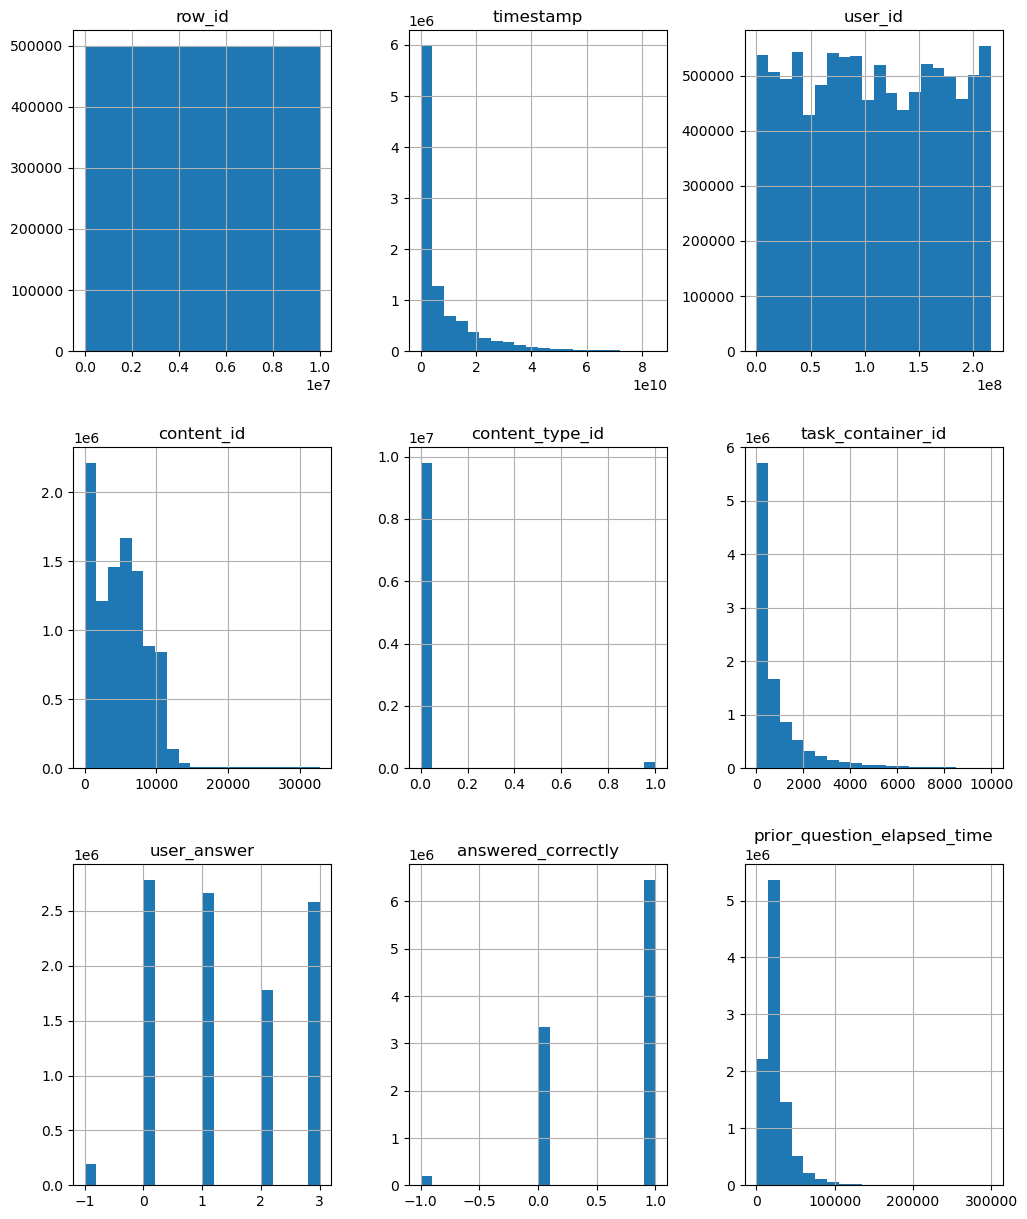

In [41]:
df_train.hist(bins=20, figsize=(12, 15))

Также отобразим распределение по булевой колонке prior_question_had_explanation

<Axes: xlabel='prior_question_had_explanation', ylabel='count'>

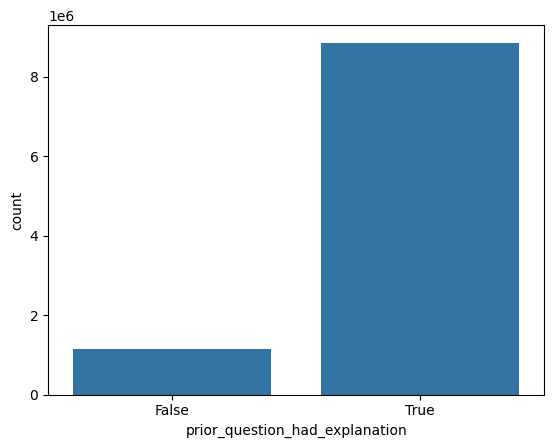

In [42]:
df_prev_explanation = df_train[['row_id','prior_question_had_explanation']]
sns.countplot(x='prior_question_had_explanation', data=df_prev_explanation)

Комментарии по распределению переменных:

**timestamp** - как видим, основной объем действий в системе осуществляется пользователями в течение примерно 4 месяцев с момента регистрации, хвост справа доходит до более 2 лет, диаграмма напоминает экспоненциальное распределение. Потенциально интересно исследовать зависимость результатов учащихся от периода с момента начала работы на образовательной платформе. Также имеет смысл подробнее изучить распределение данных в крайнем слева столбце диаграммы.

**user_id** - представленный график говорит в пользу гипотезы о том, что база упорядочена по user_id (близко к равномерному распределению по user_id). Каких-то аномалий на графике не наблюдается.

**content_id** - резкое снижение числа записей начиная с номеров в районе 11000-12000 может быть обусловлено как малым количеством вопросов с такими значениями content_id, так и тем, что учащиеся редко доходят до вопросов в конце курса или теста.

**content_type_id** - признак лекции или теста, категориальный признак. В зависимости от этого признака при анализе взаимозависимости переменных будет меняться трактовка и релевантность значений переменных в других столбцах таблицы. Как видим, в датафрейме порядка 98% - это данные по тестам, около 2% - данные по лекциям

**task_container_id** - категориальный признак группы вопросов / лекций, позволяет проследить, в каком случае вопросы/ лекции объединялись в группу, а в каком случае - нет. Может использоваться для построения других полезных в анализе метрик.

**user_answer** - категориальный признак внутри категории content_id, в отрыве от content_id смысла не несет, но может быть использован для анализа прохождения конкретных тестовых заданий

**answered_correctly** - один из наиболее ценных признаков для анализа успеваемости. Как уже обсуждалось, answered_correctly практически наверняка будет использоваться для расчета таргета. Кроме того, результат прохождения предыдущих заданий имеет смысл рассматривать как фактор, влияющий на прохождение последующих тестов.

**prior_question_elapsed_time** - показатель скорости прохождения предыдущего теста, может быть фактором, влияющим на успеваемость

**prior_question_had_explanation** - наличие обратной связи по предыдущему вопросу, категориальный признак - может быть фактором, влияющим на успеваемость. Значения False в значительной части могут объясняться факторами, упомянутыми в условиях задачи в описании базы (неприменимость показателя к строкам с лекциями и отсутствием обратной связи для учащихся по первым нескольким вопросам в тесте)


## 5. Анализ выбросов

Анализ выбросов не имеет смысла для категориальных переменных.

Фактически, в нашем датасете всего два столбца, где число может нести какую-то смысловую нагрузку, а не быть просто идентификатором какого-то признака/подмножества, это колонки timestamp и prior_question_elapsed_time.

Построим для них диаграммы boxplot.

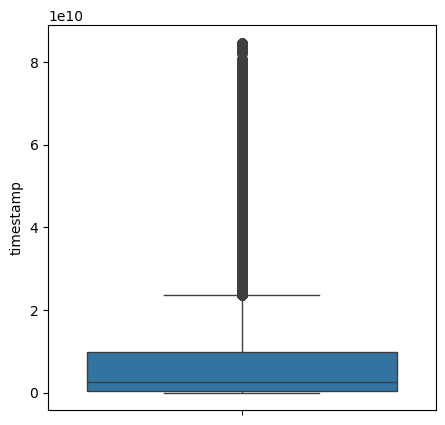

In [43]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_train['timestamp'])
plt.show()

Как мы раньше отмечали, распределение переменной timestamp напоминает экспоненциальное. С учетом этого, результаты, отображенные в boxplot, ожидаемы. Медиана смещена в низ диаграммы, вверху диаграммы значительный хвост с выбросами.

Значение переменной измеряется в милисекундах, это означает, что все выбросы укладываются в диапазон до 3 лет. С учетом смысла данной переменной (по сути, это время, прошедшее с момента регистрации пользователя на платформе), срок до 3 лет является вполне допустимым. Поэтому имеет смысл оставить эти выбросы в датафрейме.

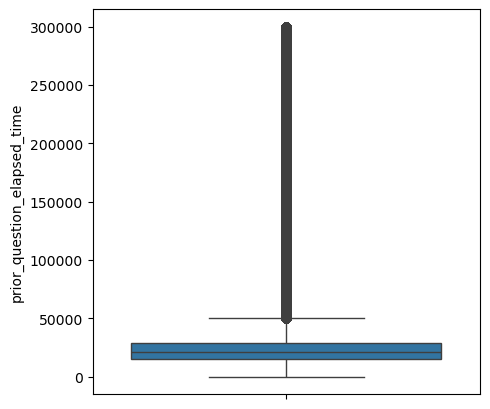

In [44]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_train['prior_question_elapsed_time'])
plt.show()

Boxplot по переменной prior_question_elapsed_time отражает большое количество выбросов вверху диаграммы. Показатель измеряется в милисекундах, это означает что значения выбросов укладываются в диапазон до 5 минут. Переменная отражает время ответа на предыдущий вопрос (или среднее время ответа на группу вопросов), показатель до 5 минут находится в рамках разумного, поэтому целесообразно оставить данные выбросы в датафрейме.

## 6. Взаимосвязь между признаками

На этапе ознакомления с данными полезно посмотреть матрицу корреляции между признаками.

Иногда это позволяет выделить признаки, которые могут обладать предсказательной способностью для таргета.

Также это полезно для выявления коррелирующих признаков, которые могут в дальнейшем порождать вопросы, связанные с мультиколлинеарностью

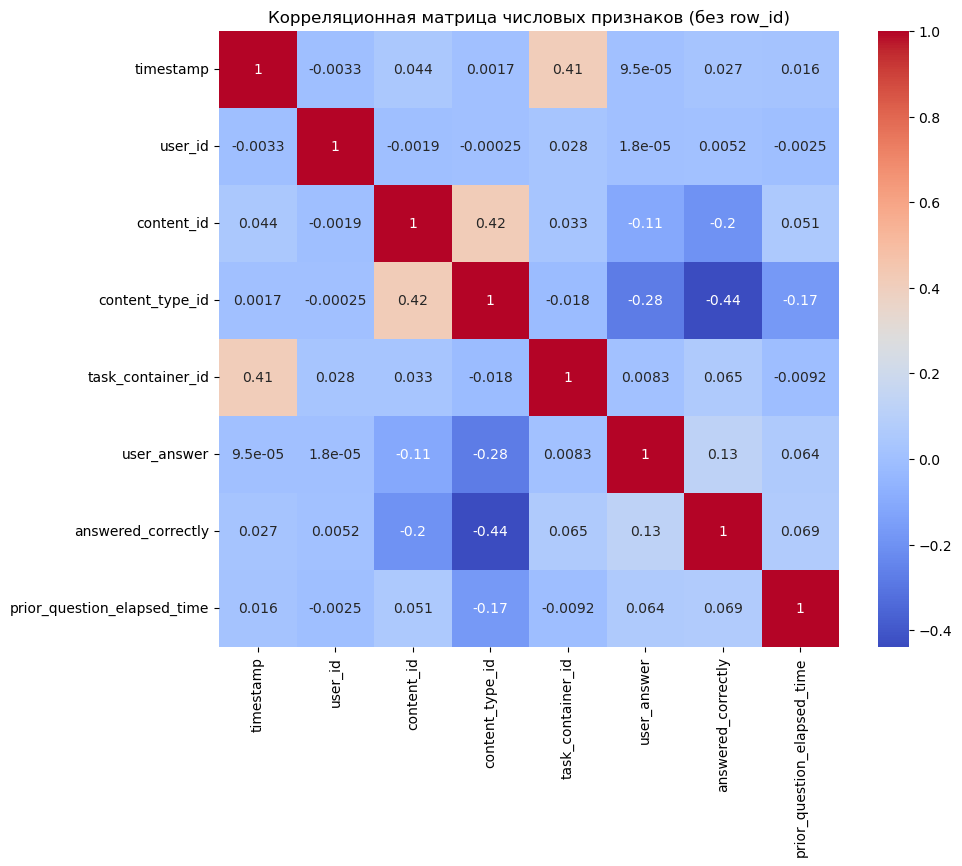

In [45]:
# Выбор только числовых признаков и удаление столбца row_id
numeric_cols = df_train.select_dtypes(include=['int8', 'int16', 'int32','int64', 'float32']).drop(columns=['row_id'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков (без row_id)')
plt.show()

Полученная диаграмма подсвечивает проблему с данными в нашем датафрейме, а именно то, что в нем объединены в одном формате данные по 2 видам объектов разной природы - лекциям и тестам, которые в большинстве случаев несравнимы друг с другом.

Имеет смысл выделить новый датафрейм, содержащий данные только по тестам, и посмотреть матрицу корреляций на нем

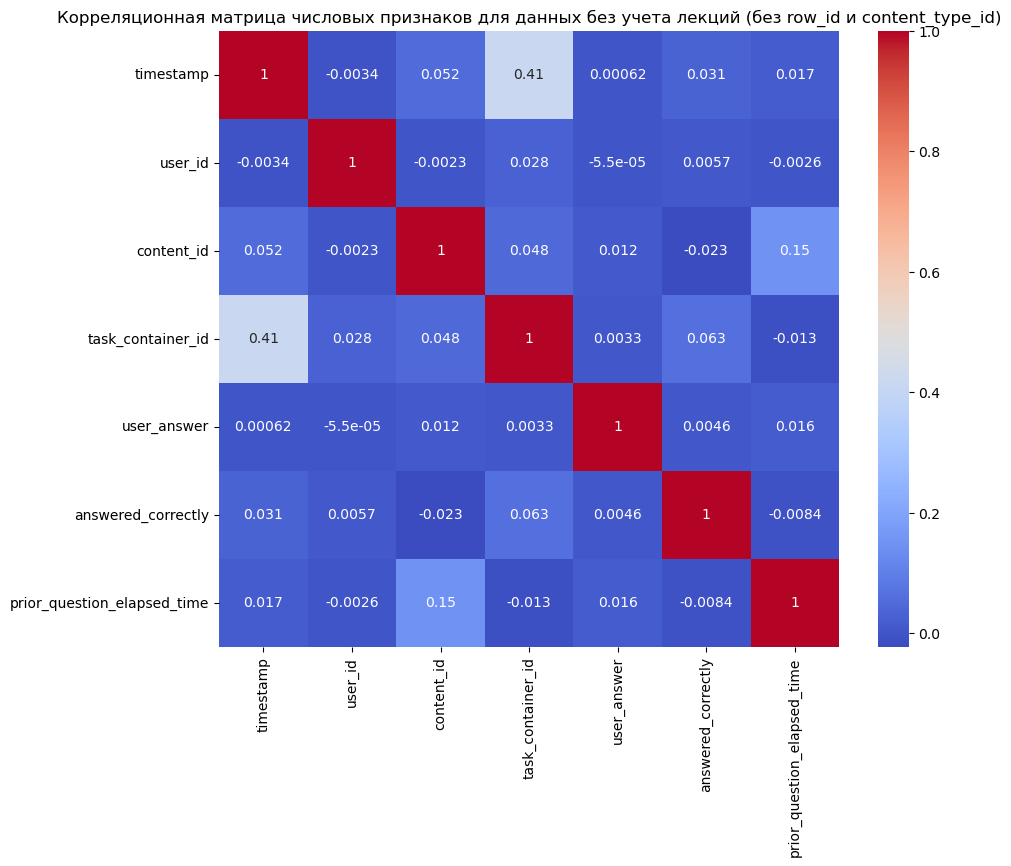

In [46]:
mask12=df_train['content_type_id']==0 # заводим маску только для тестов
# Выбор только числовых признаков и удаление столбцов row_id и content_type_id 
numeric_cols = df_train[mask12].select_dtypes(
    include=['int8', 'int16', 'int32', 'int64', 'float32']
).drop(columns=['row_id','content_type_id'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков для данных без учета лекций (без row_id и content_type_id)')
plt.show()

Выведенные результаты без учета лекций заметно отличаются от предыдущего варианта диаграммы.

Мы видим, что большинство столбцов, включая наиболее интересующий нас answered_correctly, не имеют существенной корреляции друг с другом.

Исключение составляют пара timestamp и task_container_id - корреляция 0.41, что логично, если мы учтем, что пользователь получает задания с последовательно увеличивающимся task_container_id по мере работы в системе.

На 2-м месте по значению (0.15) корреляция между парой content_id и prior_question_elapsed_time. Эта корреляция является слабой и сомнительной. Признак content_id, скорее всего, следует рассматривать как категориальный, и тогда использованный метод расчета корреляции вообще окажется неприменимым для категориальной переменной.

## 7. Итоги

На этом предварительный анализ данных можно завершить.

Мы получили представление о наполнении таблиц, убедились в отсутствии дублирующих строк, нашли и заполнили пропуски, убедились что справочники корректно подтягиваются к базе данных, получили представление о распределении данных, наличии выбросов и корреляции между переменными.

Таким образом, можно переходить к следующим этапам работы с данными, не входящим в объем работ в рамках настоящего домашнего задания.